In [12]:
import numpy as np
from PIL import Image
from PIL import ImageOps as iop
import cv2
import os

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
def gray(pic):
    return pic.convert('L')

### random paste

In [8]:
outp=64
n=0

In [9]:
def get_transparent(path=None, pic=None):
    if path is not None:
        pic = Image.open(path)
    pic = pic.convert('RGBA')
    pic = np.array(pic)
    for x in range(pic.shape[1]):
        for y in range(pic.shape[0]):
            if np.all(pic[y,x] == (127,127,127,255)):
                pic[y,x] = (127,127,127,0)
    pic = Image.fromarray(pic)
    return pic

In [10]:
ka_home = '/home/ayon/Database/CMATERdb_basic/Train/183'
pa_home = '/home/ayon/Database/CMATERdb_basic/Train/203'

In [13]:
ka_paths, pa_paths = os.listdir(ka_home), os.listdir(pa_home)

In [14]:
def new_bg():
    return Image.fromarray(np.ones((outp,outp))*255)

In [15]:
x1,y1,x2,y2,w1,h1,w2,h2=[0]*8
bg = Image.fromarray(np.ones((outp,outp))*255)

In [17]:
KA = ka_paths[np.random.randint(0,len(ka_paths))]
PA = pa_paths[np.random.randint(0,len(pa_paths))]
x1, y1 =  np.random.randint(0,5, 2) 
h1, w1 = np.random.randint(30, 37, size=2)
im1 = get_transparent(path= os.path.join(ka_home, KA)).resize((h1,w1))
im2 = 0

x_marg = 32
y_marg = 32

bg = new_bg()
bg_siz = np.array(np.array(bg).shape) - 3
# while n<=2 :
x2 = np.random.randint(int(x1 + w1/8), bg_siz[1] - x_marg)
y2 = np.random.randint(int(y1 + h1/8), bg_siz[0] - y_marg)
w2 = bg_siz[1]-np.random.randint(0,5)-x2
h2 = bg_siz[0]-np.random.randint(0,5)-y2
im2 = get_transparent(path= os.path.join(pa_home,PA)).resize((h2,w2))

bg.paste(im1, (x1,y1), im1)
bg.paste(im2, (x2,y2), im2)
bg = bg.convert('RGB')
bg.save('/home/ayon/Pictures/new.png')
# bg.load()
# bg.show()
x1,y1,w1,h1
x2,y2,w2,h2

(1, 3, 34, 30)

(9, 22, 52, 36)

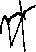

In [18]:
im1
im2

In [19]:
np.array(np.array(bg).shape)

array([64, 64,  3])

In [21]:
get_transparent(pic=bg).save('/home/ayon/Pictures/bg.png')